# K-means Clustering

### Import resources and display image

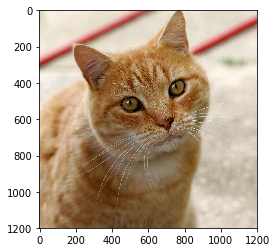

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
## TODO: Check out the images directory to see other images you can work with
# And select one!
image = cv2.imread('./Cat03.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Prepare data for k-means

In [7]:
# Reshape image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
# -1 lets numpy figure out what the size of the array is for reshaping

# Convert to float type
pixel_vals = np.float32(pixel_vals)

### Implement k-means clustering

[[ 79  41  11]
 [234 225 209]
 [158 120  84]
 [182 149 113]
 [201 177 152]
 [134  96  60]
 [112  73  36]
 [216 201 183]]
[7 7 7 ... 1 1 1]


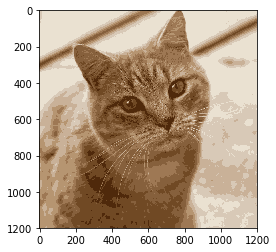

In [17]:
# define stopping criteria
# you can change the number of max iterations for faster convergence!
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.5)

## TODO: Select a value for k
# then perform k-means clustering
# try changing the values of k
k = 8
# prints out the 4 most active colors
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
print(centers)
print(labels.flatten())

# each pixel in the image has now a label associated that classifies it in one of the k catagories
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

plt.imshow(segmented_image)

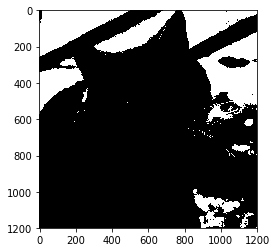

In [28]:
## TODO: Visualize one segment, try to find which is the leaves, background, etc!
plt.imshow(labels_reshape==1, cmap='gray')

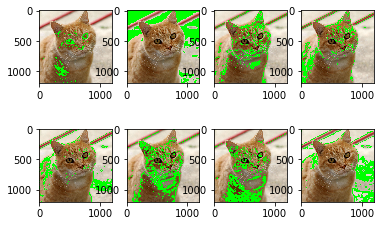

In [51]:
# mask an image segment by cluster


masked_image = [np.copy(image) for i in range(0,k)]
# turn the mask green!
for i in range(0,k):
    masked_image[i][labels_reshape == i] = [0, 255, 0]
fig,axs = plt.subplots(2,4)
for i in range(0,2):
    for j in range(0,4):
        axs[i,j].imshow(masked_image[4*i+j])
#plt.imshow(masked_image)